In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import mtdnetwork.network as network
import mtdnetwork.hacker as hacker

from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.osshuffle import OSShuffle
from mtdnetwork.mtd.serviceshuffle import ServiceShuffle
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle

import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

Number of endpoints: 2


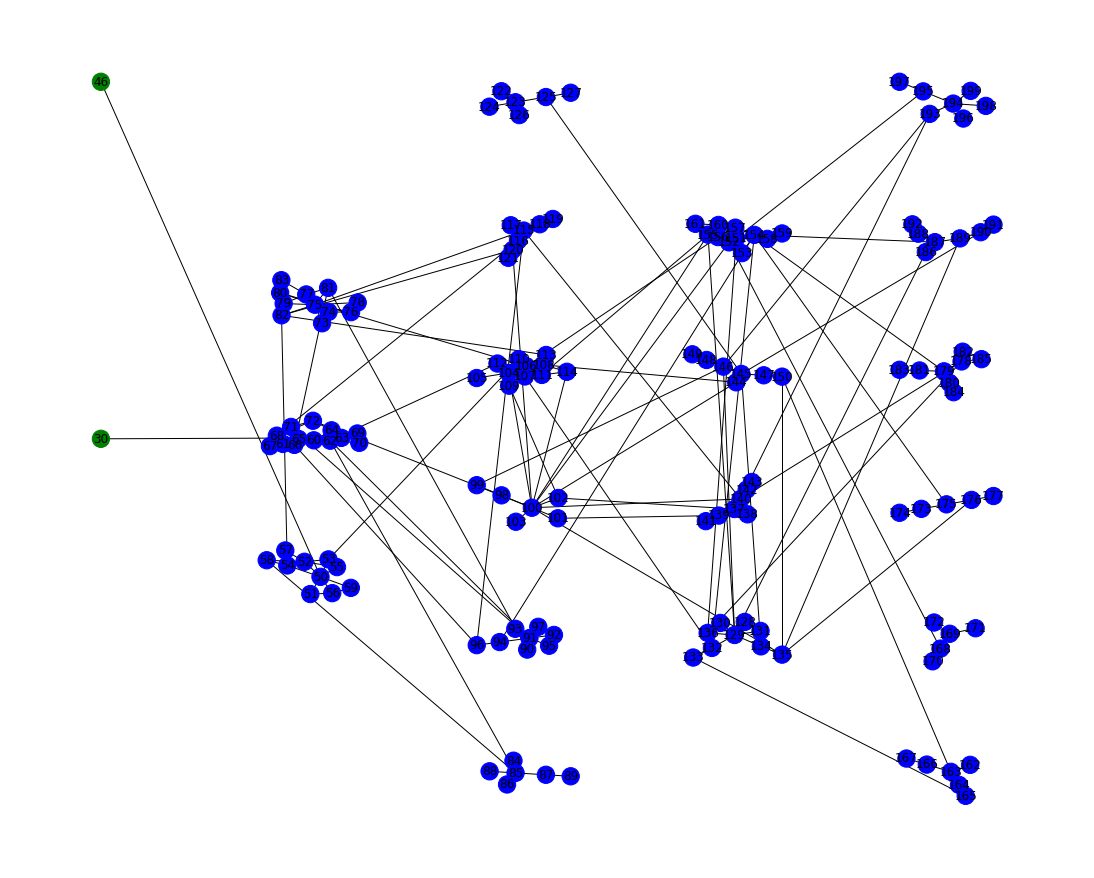

In [69]:
#Note, limited to 5 subnets per layer
test_network = network.Network(200, 50, 20, 5)
# test_network.register_mtd(PortShuffle)
test_network.register_mtd(IPShuffle)
# test_network.register_mtd(OSShuffle)
# test_network.register_mtd(ServiceShuffle)
# test_network.register_mtd(UserShuffle)
# test_network.register_mtd(HostTopologyShuffle)
# test_network.register_mtd(CompleteTopologyShuffle)
test_network.draw()

In [4]:
test_network.gen_graph()

Number of endpoints: 5


Target Node is:  101


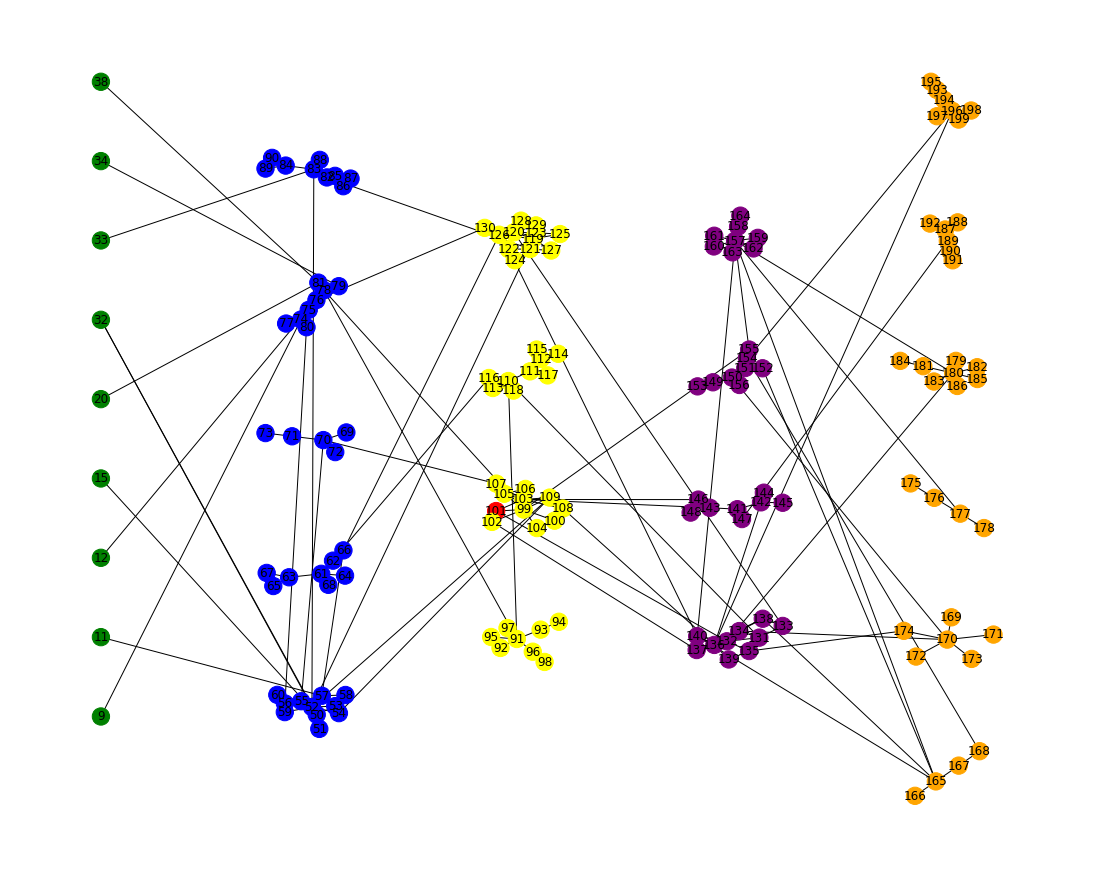

In [74]:
import mtdnetwork.targetnetwork as targetnetwork
alt_network = targetnetwork.Network(200, 50, 20, 5,2)
alt_network.register_mtd(PortShuffle)
# alt_network.register_mtd(IPShuffle)
# alt_network.register_mtd(OSShuffle)
# alt_network.register_mtd(ServiceShuffle)
# alt_network.register_mtd(UserShuffle)
# alt_network.register_mtd(HostTopologyShuffle)
# alt_network.register_mtd(CompleteTopologyShuffle)
alt_network.draw()

In [6]:
alt_network.get_host_id_priority(106)

1

In [7]:
import mtdnetwork.scorer as scorer
stats = scorer.Statistics("CompromiseStatistics")
stats.get_dict()



{'record name': 'CompromiseStatistics',
 'x': [],
 'y': [],
 'cumulative y': [],
 'total events': 0}

In [8]:
test_network.get_statistics()

{'Total Initial Vulnerabilities': 455,
 'Initial Vulns Per OS': {'ubuntu': {'18.04': 17,
   '16.04': 20,
   '20.04': 2,
   '14.04': 15,
   '12.04': 9},
  'windows': {'8.1': 25, 'xp': 67, '7': 23, '8': 23, '10': 7, 'vista': 13},
  'centos': {'5': 32, '7': 9, '4': 19, '3': 57, '6': 24, '8': 7},
  'freebsd': {'13': 13, '11': 16, '12': 17, '9': 12, '10': 28}},
 'Average Initial RoA Per OS': {'ubuntu': {'18.04': 0.07492955333713609,
   '16.04': 0.06866119452831823,
   '20.04': 0.03323197131043033,
   '14.04': 0.03495246555505687,
   '12.04': 0.04164845370812012},
  'windows': {'8.1': 0.09299258738905893,
   'xp': 0.047037110066635336,
   '7': 0.04036741425548143,
   '8': 0.06765834362985731,
   '10': 0.025212932719511607,
   'vista': 0.05022912320772616},
  'centos': {'5': 0.05373595831061892,
   '7': 0.07537613159532931,
   '4': 0.03386472344246895,
   '3': 0.06366384496559474,
   '6': 0.09362366529185512,
   '8': 0.053698711605297836},
  'freebsd': {'13': 0.03189433622723485,
   '11': 0.0

In [71]:
adversary = hacker.Hacker(alt_network)

In [65]:
curr_time = 0
time_step = 1
for curr_time in range(200000):
    alt_network.step(curr_time)
    adversary.step(curr_time)
    if adversary.done:
        break
print("DONE")
print("TIME:", curr_time)

Setup host_enum run, host stack is:  [1, 3, 4, 11, 13, 14, 15, 16, 17, 18, 19, 20, 33, 34, 37, 39, 41]


INFO:mtdnetwork.hacker:VULN COMPROMISE:20:ubuntu:10.04
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:14:windows:8.1


This host has been compromised:  20
Setup host_enum run, host stack is:  [59, 1, 3, 4, 11, 13, 14, 15, 16, 17, 18, 19, 33, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:VULN COMPROMISE:19:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:55:ubuntu:18.04


This host has been compromised:  14
This host has been compromised:  19
This host has been compromised:  55


INFO:mtdnetwork.hacker:VULN COMPROMISE:56:centos:8


This host has been compromised:  56


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtd:portshuffle:changing ports of services on hosts


Setup host_enum run, host stack is:  [102, 118, 92, 59, 77, 52, 53, 77, 53, 57, 1, 3, 4, 11, 13, 15, 16, 17, 18, 33, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 1000
INFO:mtdnetwork.hacker:Re-doing port scan on host 57
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 988
INFO:mtdnetwork.hacker:Re-doing port scan on host 102
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [102, 118, 53, 59, 53, 77, 57, 92, 52, 77, 1, 3, 4, 11, 13, 15, 16, 17, 18, 33, 34, 37, 39, 41]


INFO:mtdnetwork.hacker:VULN COMPROMISE:3:centos:7
INFO:mtd:portshuffle:changing ports of services on hosts


This host has been compromised:  3


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [118, 102, 52, 77, 53, 77, 53, 92, 59, 57, 1, 4, 11, 13, 15, 16, 17, 18, 33, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [118, 102, 77, 57, 77, 59, 92, 53, 53, 52, 1, 4, 11, 13, 15, 16, 17, 18, 33, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [102, 118, 52, 92, 59, 57, 77, 53, 77, 53, 1, 4, 11, 13, 15, 16, 17, 18, 33, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 976
INFO:mtdnetwork.hacker:Re-doing port scan on host 59
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [102, 118, 53, 53, 52, 77, 57, 92, 77, 59, 1, 4, 11, 13, 15, 16, 17, 18, 33, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 964
INFO:mtdnetwork.hacker:Re-doing port scan on host 57


Setup host_enum run, host stack is:  [102, 118, 92, 77, 53, 57, 52, 53, 59, 77, 1, 4, 11, 13, 15, 16, 17, 18, 33, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [102, 118, 59, 57, 77, 52, 77, 53, 92, 53, 1, 4, 11, 13, 15, 16, 17, 18, 33, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:VULN COMPROMISE:33:centos:7
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


This host has been compromised:  33
Setup host_enum run, host stack is:  [118, 102, 92, 53, 77, 52, 53, 77, 59, 57, 1, 4, 11, 13, 15, 16, 17, 18, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 952
INFO:mtdnetwork.hacker:Re-doing port scan on host 57


Setup host_enum run, host stack is:  [102, 118, 77, 92, 59, 52, 57, 77, 53, 53, 1, 4, 11, 13, 15, 16, 17, 18, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [102, 118, 53, 52, 53, 59, 57, 92, 77, 77, 1, 4, 11, 13, 15, 16, 17, 18, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [118, 102, 77, 53, 92, 53, 59, 77, 52, 57, 1, 4, 11, 13, 15, 16, 17, 18, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [102, 118, 57, 53, 53, 52, 77, 77, 59, 92, 1, 4, 11, 13, 15, 16, 17, 18, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 940
INFO:mtdnetwork.hacker:Re-doing port scan on host 52
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [102, 118, 59, 57, 52, 53, 77, 53, 77, 92, 1, 4, 11, 13, 15, 16, 17, 18, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 927
INFO:mtdnetwork.hacker:Re-doing port scan on host 59


Setup host_enum run, host stack is:  [102, 118, 77, 59, 57, 53, 52, 53, 92, 77, 1, 4, 11, 13, 15, 16, 17, 18, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 916
INFO:mtdnetwork.hacker:Re-doing port scan on host 53


Setup host_enum run, host stack is:  [102, 118, 57, 92, 52, 53, 53, 59, 77, 77, 1, 4, 11, 13, 15, 16, 17, 18, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 904
INFO:mtdnetwork.hacker:Re-doing port scan on host 57
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 892
INFO:mtdnetwork.hacker:Re-doing port scan on host 57
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [102, 118, 59, 77, 92, 52, 77, 53, 53, 57, 1, 4, 11, 13, 15, 16, 17, 18, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 880
INFO:mtdnetwork.hacker:Re-doing port scan on host 77
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [102, 118, 57, 77, 52, 53, 53, 92, 77, 59, 1, 4, 11, 13, 15, 16, 17, 18, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 868
INFO:mtdnetwork.hacker:Re-doing port scan on host 53
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 856
INFO:mtdnetwork.hacker:Re-doing port scan on host 77


Setup host_enum run, host stack is:  [118, 102, 57, 59, 53, 77, 52, 53, 77, 92, 1, 4, 11, 13, 15, 16, 17, 18, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [118, 102, 53, 52, 77, 57, 59, 77, 53, 92, 1, 4, 11, 13, 15, 16, 17, 18, 34, 37, 39, 41]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 844
INFO:mtdnetwork.hacker:Re-doing port scan on host 52
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:VULN COMPROMISE:41:freebsd:13
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


This host has been compromised:  41
Setup host_enum run, host stack is:  [118, 102, 92, 52, 57, 77, 53, 59, 77, 53, 1, 4, 11, 13, 15, 16, 17, 18, 34, 37, 39]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 832
INFO:mtdnetwork.hacker:Re-doing port scan on host 53
INFO:mtdnetwork.hacker:VULN COMPROMISE:18:windows:8.1
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 820
INFO:mtdnetwork.hacker:Re-doing port scan on host 86


This host has been compromised:  18


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [118, 102, 53, 92, 57, 52, 59, 86, 53, 77, 77, 1, 4, 11, 13, 15, 16, 17, 34, 37, 39]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 808
INFO:mtdnetwork.hacker:Re-doing port scan on host 92
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:77:windows:7
INFO:mtdnetwork.hacker:USER REUSED PASS COMPROMISE:76:freebsd:11


This host has been compromised:  77
This host has been compromised:  76


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [118, 102, 118, 118, 53, 57, 59, 52, 53, 80, 86, 78, 92, 79, 1, 4, 11, 13, 15, 16, 17, 34, 37, 39]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 796
INFO:mtdnetwork.hacker:Re-doing port scan on host 118
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 784
INFO:mtdnetwork.hacker:Re-doing port scan on host 78
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtd:portshuffle:changing ports of services on hosts


Setup host_enum run, host stack is:  [118, 118, 102, 118, 52, 53, 80, 79, 53, 59, 57, 86, 78, 92, 1, 4, 11, 13, 15, 16, 17, 34, 37, 39]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [118, 118, 118, 102, 86, 53, 92, 80, 79, 57, 78, 53, 59, 52, 1, 4, 11, 13, 15, 16, 17, 34, 37, 39]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 772
INFO:mtdnetwork.hacker:Re-doing port scan on host 59
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 760
INFO:mtdnetwork.hacker:Re-doing port scan on host 79
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 748
INFO:mtdnetwork.hacker:Re-doing port scan on host 57


Setup host_enum run, host stack is:  [118, 102, 118, 118, 92, 53, 79, 57, 53, 78, 86, 59, 52, 80, 1, 4, 11, 13, 15, 16, 17, 34, 37, 39]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 736
INFO:mtdnetwork.hacker:Re-doing port scan on host 118
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:17:freebsd:12


This host has been compromised:  17


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 724
INFO:mtdnetwork.hacker:Re-doing port scan on host 86


Setup host_enum run, host stack is:  [118, 118, 118, 102, 59, 92, 53, 53, 86, 57, 53, 78, 79, 80, 52, 1, 4, 11, 13, 15, 16, 34, 37, 39]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 712
INFO:mtdnetwork.hacker:Re-doing port scan on host 52
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 700
INFO:mtdnetwork.hacker:Re-doing port scan on host 118
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [118, 118, 118, 102, 53, 53, 79, 57, 78, 92, 59, 80, 52, 86, 53, 1, 4, 11, 13, 15, 16, 34, 37, 39]


INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 688
INFO:mtdnetwork.hacker:Re-doing port scan on host 52
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 675
INFO:mtdnetwork.hacker:Re-doing port scan on host 80
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtd:portshuffle:changing ports of services on hosts


Setup host_enum run, host stack is:  [102, 118, 118, 118, 86, 78, 80, 53, 92, 53, 79, 53, 59, 52, 57, 1, 4, 11, 13, 15, 16, 34, 37, 39]


INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 664
INFO:mtdnetwork.hacker:Re-doing port scan on host 57
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:MTD operation blocked action!
INFO:mtdnetwork.hacker:Time Penality: 651
INFO:mtdnetwork.hacker:Re-doing port scan on host 52
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtd:portshuffle:changing ports of services on hosts
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Setup host_enum run, host stack is:  [102, 118, 118, 118, 53, 59, 86, 57, 52, 80, 53, 92, 53, 78, 79, 1, 4, 11, 13, 15, 16, 34, 37, 39]
DONE
TIME: 199999


In [66]:
adversary.get_statistics()

{'Total Host Compromises': 12,
 'Total User Compromises': 48,
 'Total Vuln Compromises': 8,
 'Total Reuse Pass Compromises': 3,
 'Total Password Spray Compromises': 1,
 'Total Actions Blocked by MTD': 30,
 'Compromised hosts': [20, 14, 19, 55, 56, 3, 33, 41, 18, 77, 76, 17]}

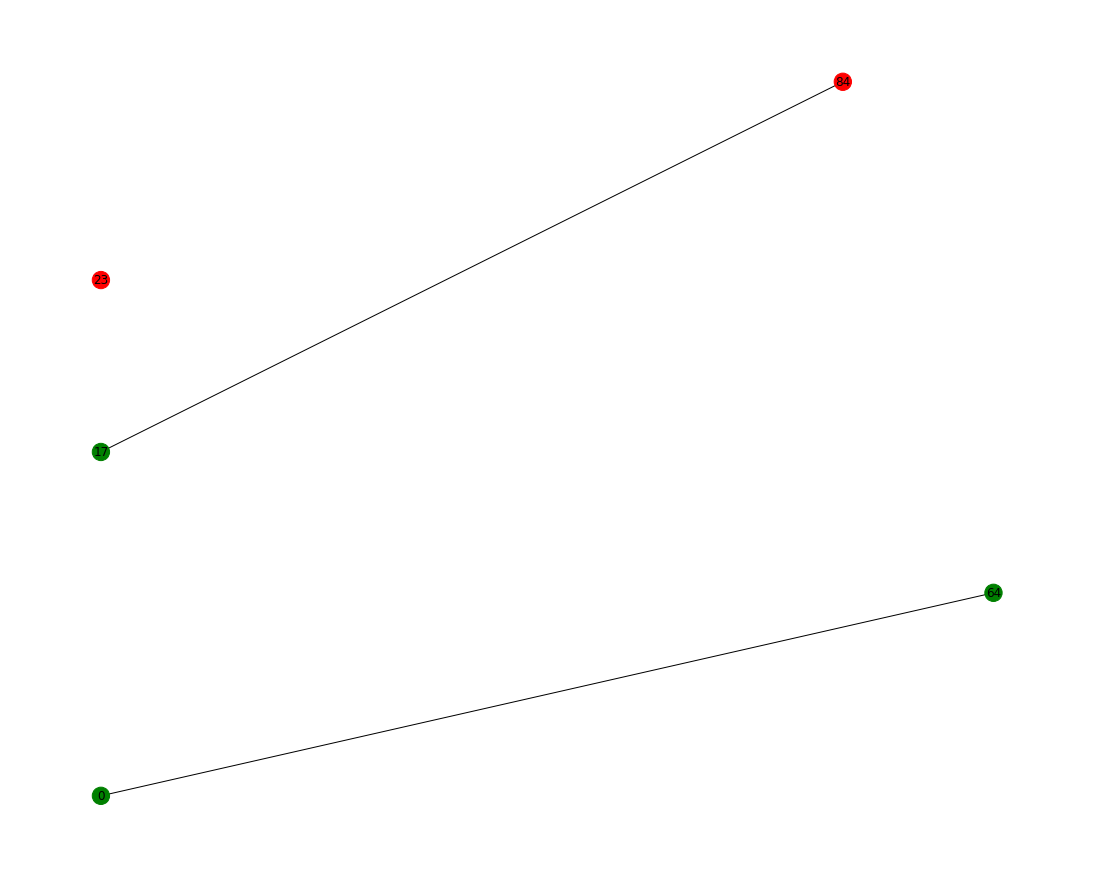

In [42]:
test_network.draw_compromised(adversary.compromised_hosts)

In [33]:
test_network.get_statistics()

{'Total Initial Vulnerabilities': 680,
 'Initial Vulns Per OS': {'freebsd': {'13': 10,
   '8': 99,
   '12': 11,
   '9': 47,
   '10': 11,
   '11': 13},
  'centos': {'5': 35, '7': 14, '8': 3, '4': 22, '6': 8, '3': 98},
  'ubuntu': {'18.04': 27,
   '14.04': 40,
   '12.04': 32,
   '20.04': 9,
   '16.04': 9,
   '10.04': 34},
  'windows': {'8': 39, 'vista': 18, '7': 16, '8.1': 19, '10': 6, 'xp': 60}},
 'Average Initial RoA Per OS': {'freebsd': {'13': 0.054521936627872435,
   '8': 0.05264753073271049,
   '12': 0.044327213818346284,
   '9': 0.0520091406727349,
   '10': 0.10955879073697078,
   '11': 0.02726930109204184},
  'centos': {'5': 0.050625841122874125,
   '7': 0.05210013040319381,
   '8': 0.016193148229765725,
   '4': 0.06224807217377073,
   '6': 0.01835288697970214,
   '3': 0.057248767500893916},
  'ubuntu': {'18.04': 0.07029174261366014,
   '14.04': 0.06978854781219358,
   '12.04': 0.06999593701567618,
   '20.04': 0.09310252839182881,
   '16.04': 0.03182111983158312,
   '10.04': 0.090

In [ ]:
test_network.draw()

In [ ]:
adversary.observed_changes

In [ ]:
test_network.users_list

In [ ]:
import random
random.randint(1,20)